# Projekt 1

## Klaudia Gruszkowska, Bartosz Jamroży

In [1]:
#wczytanie pakietów
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# wczytanie danych 
school_grades_df = pd.read_csv('school_grades_dataset.csv')

In [19]:
#wczytanie opisów
school_grades_attributes = pd.read_csv('attributes_school_grades.csv',sep="\",\"",engine='python')
pd.options.display.max_colwidth =0
school_grades_attributes

,"ď»ż""name",type,"description"""
0,"""school",string,"student's school (binary: ""GP"" Gabriel Pereira or ""MS"" Mousinho da Silveira)"""
1,"""sex",string,"student's sex (binary: ""F"" female or ""M"" male)"""
2,"""age",integer,"student's age (numeric: from 15 to 22)"""
3,"""address",string,"student's home address type (binary: ""U"" urban or ""R"" rural)"""
4,"""famsize",string,"family size (binary: ""LE3"" less or equal to 3 or ""GT3"" greater than 3)"""
5,"""Pstatus",string,"parent's cohabitation status (binary: ""T"" living together or ""A"" apart)"""
6,"""Medu",integer,"mother's education (numeric: 0: none, 1: primary education (4th grade), 2: 5th to 9th grade, 3 _ secondary education or 4 _ higher education)"""
7,"""Fedu",integer,"father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 _ 5th to 9th grade, 3 _ secondary education or 4 _ higher education)"""
8,"""Mjob",string,"mother's job (nominal: ""teacher"", ""health"" care related, civil ""services"" (e.g. administrative or police), ""at_home"" or ""other"")"""
9,"""Fjob",string,"father's job (nominal: ""teacher"", ""health"" care related, civil ""services"" (e.g. administrative or police), ""at_home"" or ""other"")"""


Naszym zadaniem dla tych danych jest predykcjazmiennej G3 czyli ostatecznej oceny dla ucznia.

In [14]:
school_grades_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [15]:
school_grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Nie ma braków danych.

In [17]:
school_grades_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


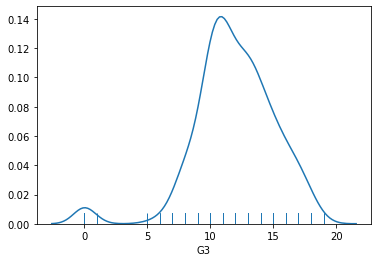

In [43]:
p=sns.distplot(school_grades_df['G3'],rug=True, hist=False);


Rozkład przypomniana normalny ale z pikiem w 0 i lekko skośny. 

In [19]:
print("Skośność: %f" % school_grades_df['G3'].skew())

Skośność: -0.912909


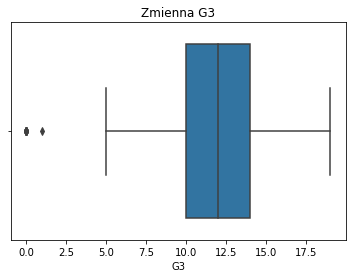

In [24]:
box_plot = sns.boxplot(school_grades_df['G3'])
box_plot.set_title('Zmienna G3')
plt.show()

Nasza zmienna celu G3 ma oznaczone wartości odstające ale nie powinniśmy ich usuwać ponieważ są ważną daną. <br>
Oraz nie są one potencjalnymi błędami pomiarowymi 

# Przegląd danych kategorycznych

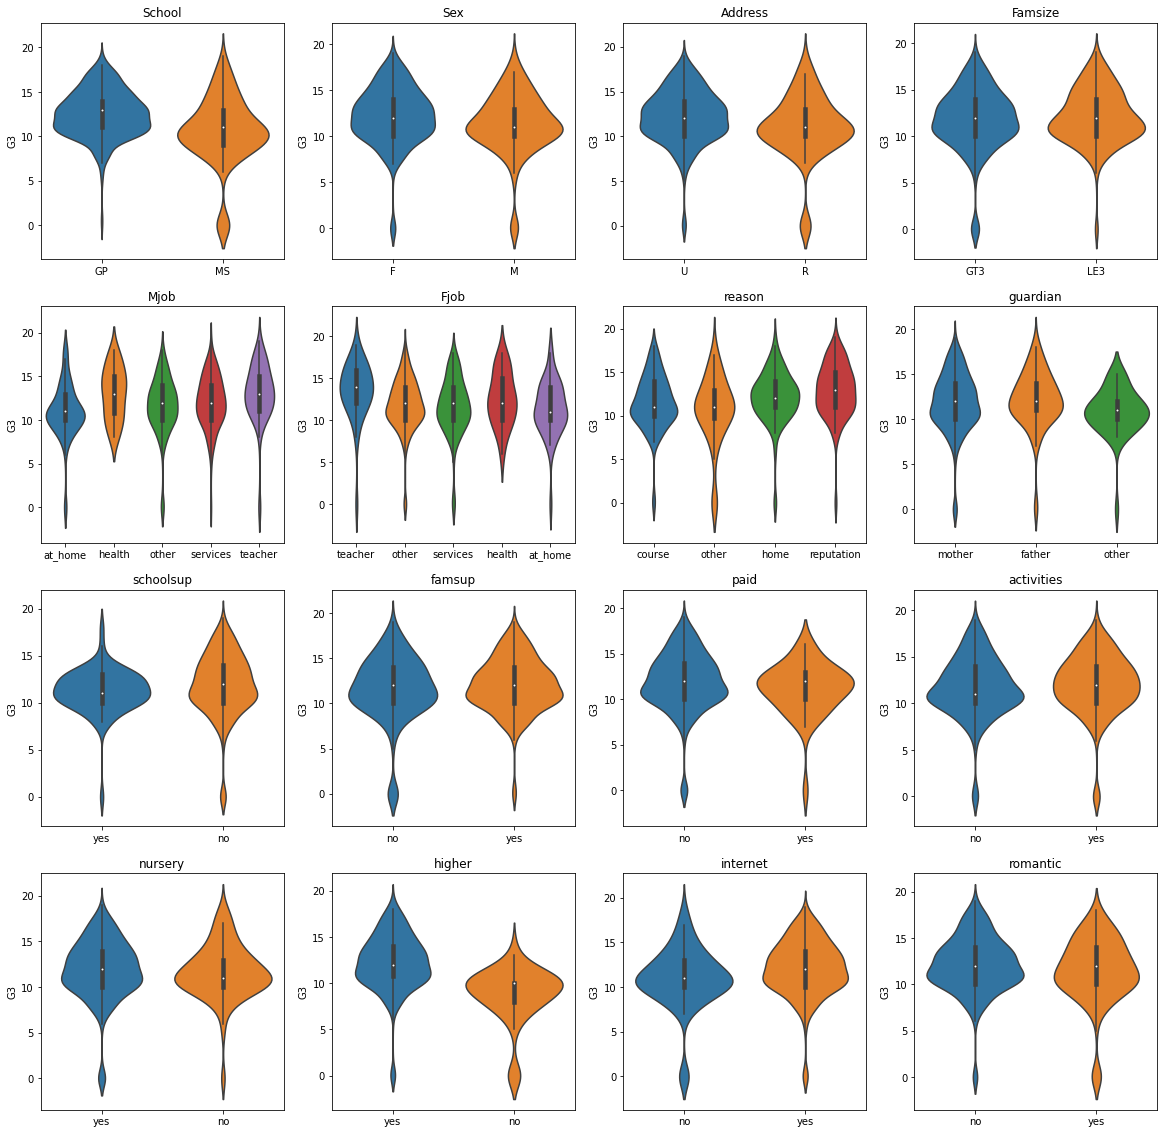

In [84]:
fig, axs = plt.subplots(4, 4,figsize=(20, 20))
sns.violinplot(ax=axs[0, 0],x=school_grades_df['school'],y= school_grades_df['G3'])
axs[0, 0].set_title('School')
axs[0, 0].set_xlabel('')
sns.violinplot(ax=axs[0, 1],x=school_grades_df['sex'], y=school_grades_df['G3'])
axs[0, 1].set_title('Sex')
axs[0, 1].set_xlabel('')
sns.violinplot(ax=axs[0, 2],x=school_grades_df['address'], y=school_grades_df['G3'])
axs[0, 2].set_title('Address')
axs[0, 2].set_xlabel('')
sns.violinplot(ax=axs[0, 3],x=school_grades_df['famsize'], y=school_grades_df['G3'])
axs[0, 3].set_title('Famsize')
axs[0, 3].set_xlabel('')
sns.violinplot(ax=axs[1, 0],x=school_grades_df['Mjob'], y=school_grades_df['G3'])
axs[1, 0].set_title('Mjob')
axs[1, 0].set_xlabel('')
sns.violinplot(ax=axs[1, 1],x=school_grades_df['Fjob'], y=school_grades_df['G3'])
axs[1, 1].set_title('Fjob')
axs[1, 1].set_xlabel('')
sns.violinplot(ax=axs[1, 2],x=school_grades_df['reason'], y=school_grades_df['G3'])
axs[1, 2].set_title('reason')
axs[1, 2].set_xlabel('')
sns.violinplot(ax=axs[1, 3],x=school_grades_df['guardian'], y=school_grades_df['G3'])
axs[1, 3].set_title('guardian')
axs[1, 3].set_xlabel('')
sns.violinplot(ax=axs[2, 0],x=school_grades_df['schoolsup'], y=school_grades_df['G3'])
axs[2, 0].set_title('schoolsup')
axs[2, 0].set_xlabel('')
sns.violinplot(ax=axs[2, 1],x=school_grades_df['famsup'], y=school_grades_df['G3'])
axs[2, 1].set_title('famsup')
axs[2, 1].set_xlabel('')
sns.violinplot(ax=axs[2, 2],x=school_grades_df['paid'], y=school_grades_df['G3'])
axs[2, 2].set_title('paid')
axs[2, 2].set_xlabel('')
sns.violinplot(ax=axs[2, 3],x=school_grades_df['activities'], y=school_grades_df['G3'])
axs[2, 3].set_title('activities')
axs[2, 3].set_xlabel('')
sns.violinplot(ax=axs[3, 0],x=school_grades_df['nursery'], y=school_grades_df['G3'])
axs[3, 0].set_title('nursery')
axs[3, 0].set_xlabel('')
sns.violinplot(ax=axs[3, 1],x=school_grades_df['higher'], y=school_grades_df['G3'])
axs[3, 1].set_title('higher')
axs[3, 1].set_xlabel('')
sns.violinplot(ax=axs[3, 2],x=school_grades_df['internet'], y=school_grades_df['G3'])
axs[3, 2].set_title('internet')
axs[3, 2].set_xlabel('')
sns.violinplot(ax=axs[3, 3],x=school_grades_df['romantic'], y=school_grades_df['G3'])
axs[3, 3].set_title('romantic')
axs[3, 3].set_xlabel('')
plt.show()

WNIOSKI:
- średnie oceny są wyższe dla szkoły Gabriel Pereira niż Mousinho da Silveira
- średnie oceny są wyższe dla kobiet niż męzczyzn
- średnie oceny są wyższe dla osób mieszkających w mieście
- dla rozmiaru rodziny dane o ocenach wyglądają bardzo podobnie
- rozkłąd podzielony na pracę matki pokazuje, że najwyższe średnie oceny otrzymują dzieci nauczycielek i kobiet pracujących w służbie zdrowia
- a w podziale na pracę ojca wyróżnia się zawód nauczyciela
- najwyższe oceny otrzymują uczniowie, którzy wybrali szkołę ze zwględu na jej reputację
- uczniowie, którzy nie korzystają z pomocy szkolnej mają bardziej rozłożone oceny; Osoby które z tej pomocy skorzystały otrzymują oceny, które mocno skupiają się w połowie skali ocen
- dla pomocy ze strony rodzicy nie widzimy takiej zależności
- higher - widać największą rożnicę w ocenach osób, które chcą zdobyć wyższe wykształcenie. Tacy uczniowie otrzymują wyższe oceny
- paid - czyli dodatkowe płatne zajęcia nie mają dużego wpływu na rozkład ocen
- activities, nursery, internet - osoby, które nie mają w domu internetu lub nie uczęszczały do szkoły pielęgniarskiej lub nie chodzą na zajęcia dodatkowe mają niższe średnie oceny

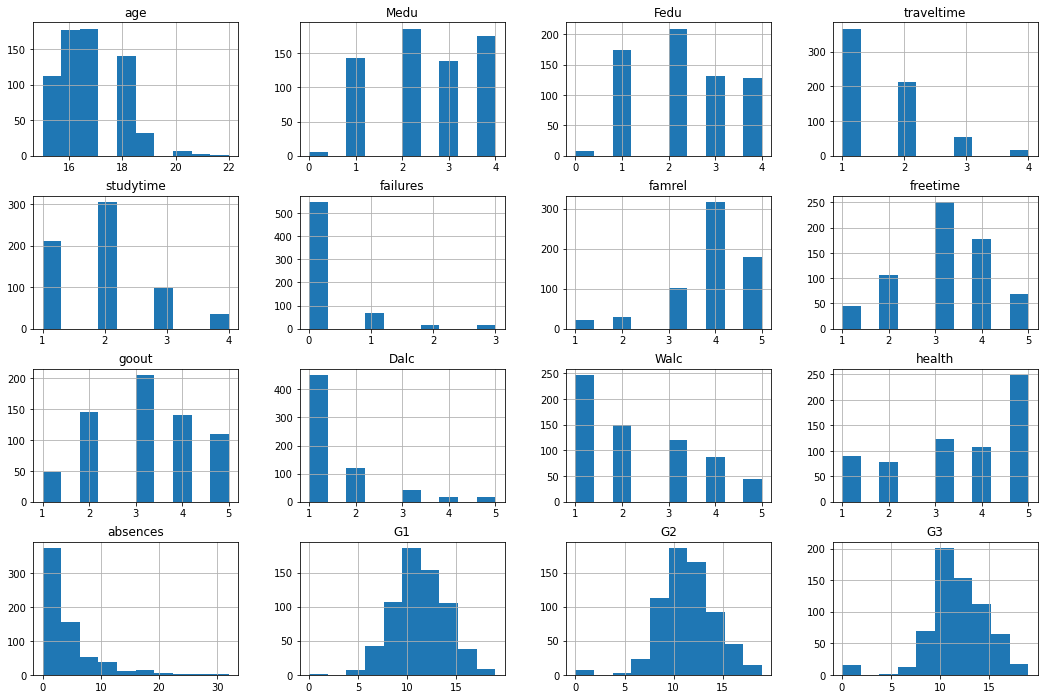

In [32]:
# wykresy rozkładów zmiennych
school_grades_df.hist(figsize=(18,12))
plt.show()

WNIOSKI:
Zmienne G1, G2, G3 są nienaturalnie pochylone na prawo

## Czytelniejsze histogramy

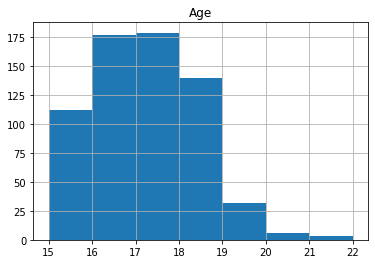

In [48]:
# rozkład wieku jest "poszatkowany" przez złą liczbe przedziałów
# histogram dla wieku, przedział- odpowiada jednemu rocznikowi 
age=school_grades_df.age
age.hist(bins=max(age)-min(age))
plt.title("Age")
plt.show()

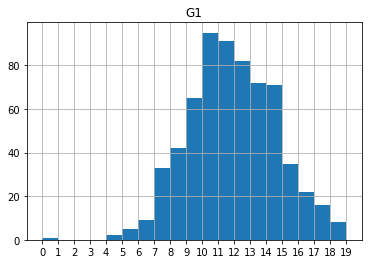

In [80]:
#grade 1
# przedział- odpowiada jednej ocenie 
G=school_grades_df.G1
p=G.hist(bins=19)
p.set_xticks(pd.Series([i for i in range(20)]))
plt.title("G1")
plt.show()

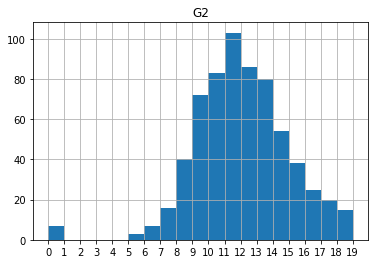

In [81]:
#grade 2
G=school_grades_df.G2
p=G.hist(bins=19)
p.set_xticks(pd.Series([i for i in range(20)]))
plt.title("G2")
plt.show()

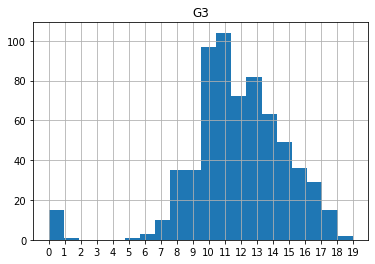

In [42]:
#grade 3
G=school_grades_df.G3
p=G.hist(bins=20)
p.set_xticks(pd.Series([i for i in range(20)]))
plt.title("G3")
plt.show()

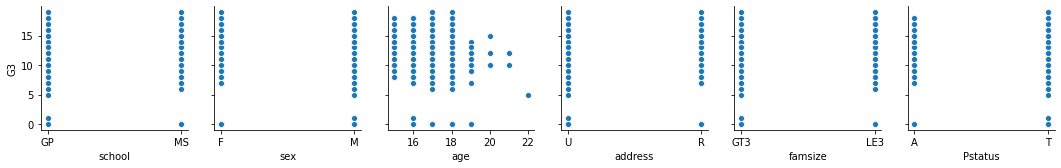

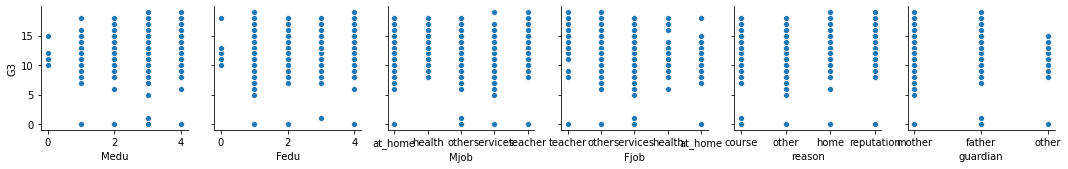

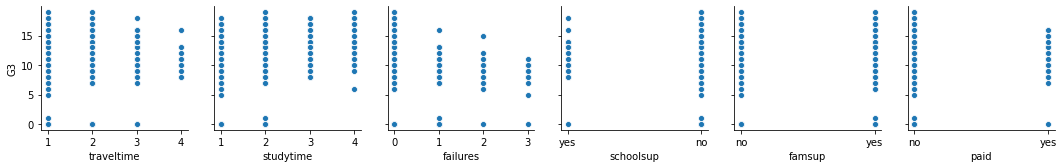

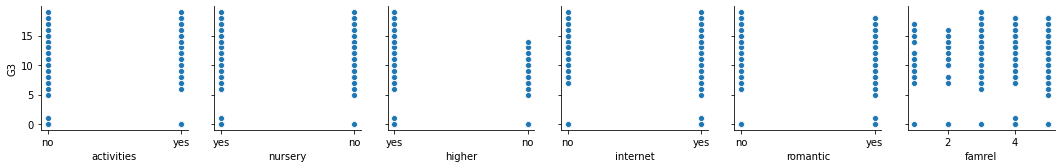

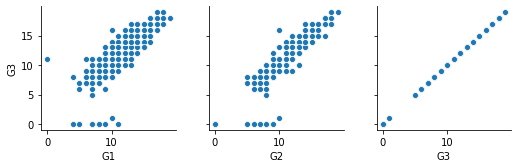

In [36]:
df=school_grades_df
n=6
sns.pairplot(df, y_vars="G3", x_vars=df.columns.values[:n])
sns.pairplot(df, y_vars="G3", x_vars=df.columns.values[n:2*n])
sns.pairplot(df, y_vars="G3", x_vars=df.columns.values[2*n:3*n])
sns.pairplot(df, y_vars="G3", x_vars=df.columns.values[3*n:4*n])
sns.pairplot(df, y_vars="G3", x_vars=df.columns.values[5*n:])
plt.show()

WNIOSKI:
- widać mocną koleracje G3 z G1 i G2 (oceny semestralne)
- im wieksza ilość niepowodzeń w poprzednich latach (failures) tym mniejsze najwieksze oceny 

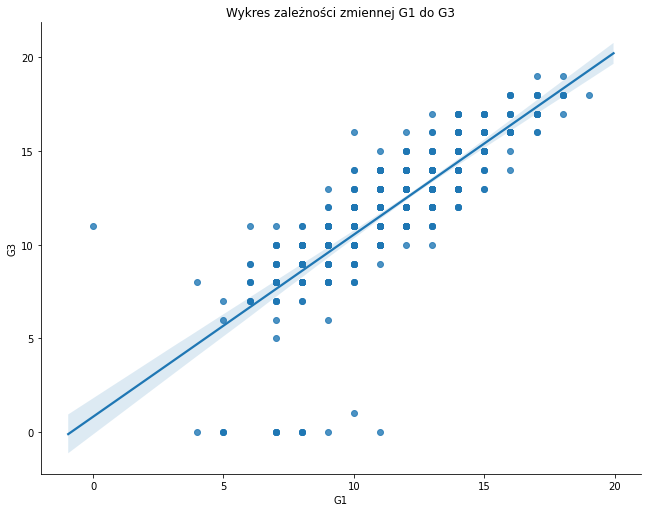

In [40]:
sns.lmplot( y='G3', x='G1', data=school_grades_df, height=7, aspect=1.3)
plt.title("Wykres zależności zmiennej G1 do G3")
plt.show()

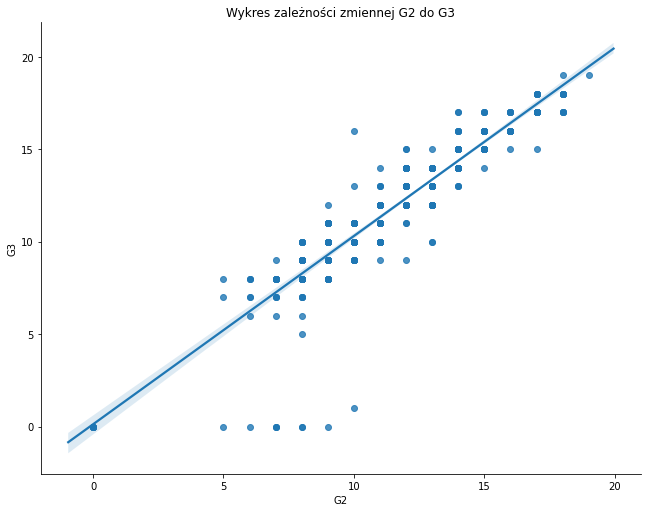

In [41]:
sns.lmplot( y='G3', x='G2', data=school_grades_df, height=7, aspect=1.3)
plt.title("Wykres zależności zmiennej G2 do G3")
plt.show()

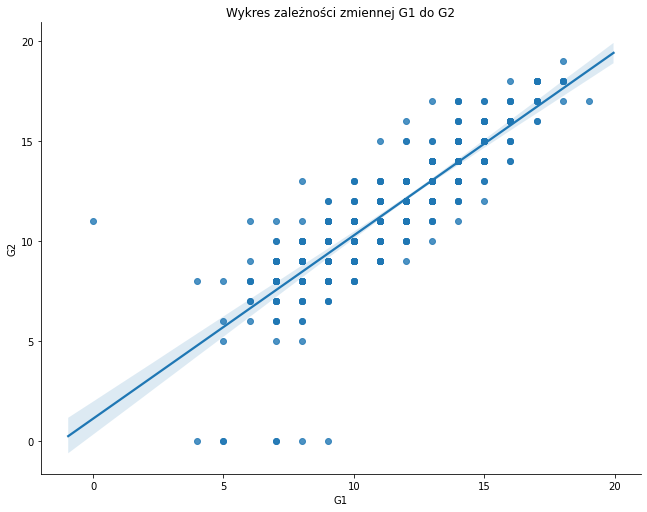

In [42]:
sns.lmplot( y='G2', x='G1', data=school_grades_df, height=7, aspect=1.3)
plt.title("Wykres zależności zmiennej G1 do G2")
plt.show()

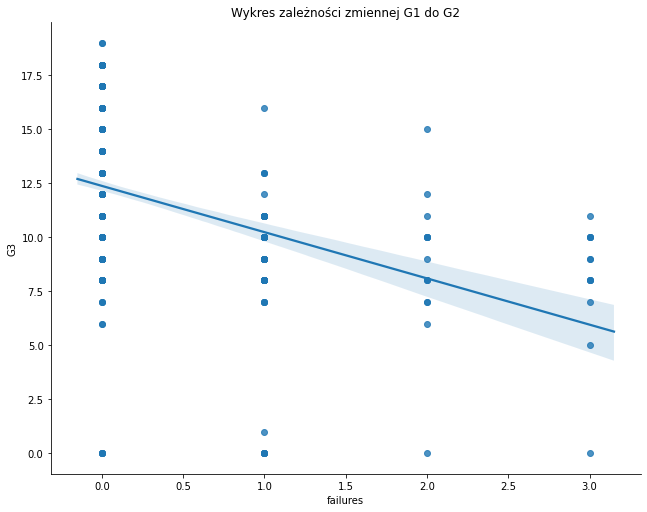

In [73]:
sns.lmplot( y='G3', x='failures', data=school_grades_df, height=7, aspect=1.3)
plt.title("Wykres zależności zmiennej G1 do G2")
plt.show()

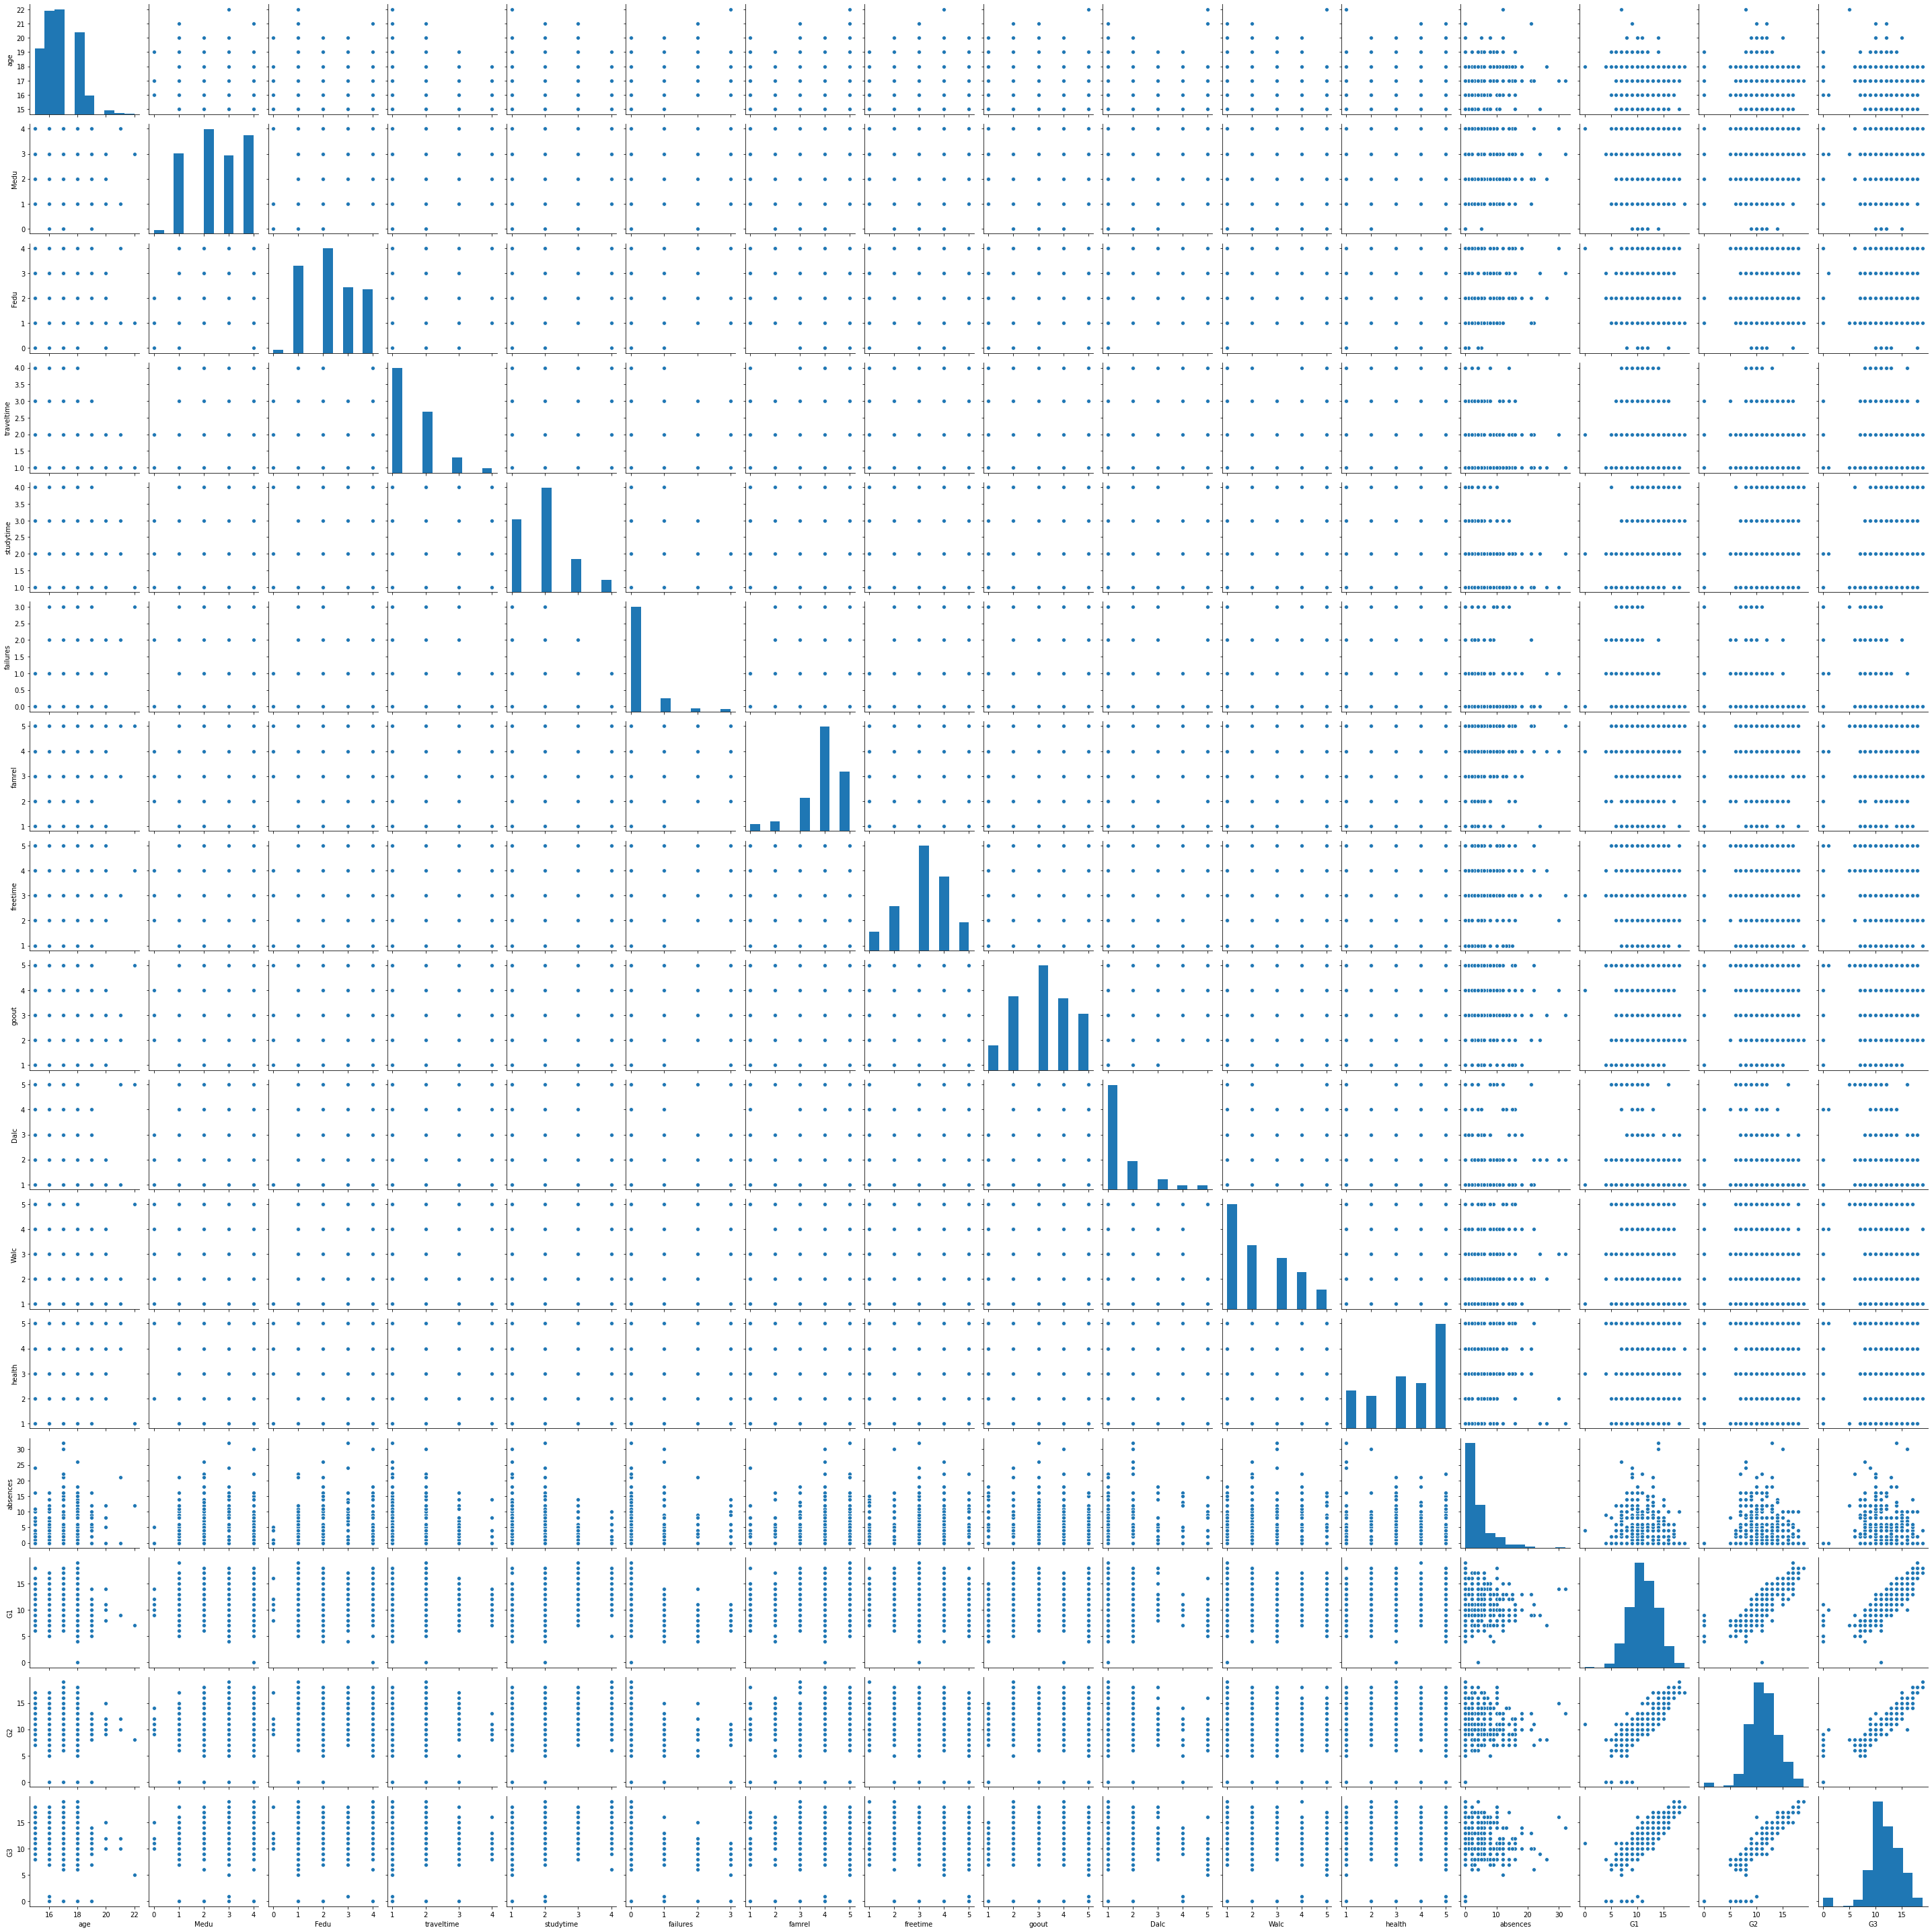

In [75]:
sns.pairplot(school_grades_df)
plt.tight_layout()

W oczy się jeden wykres o rozkładzie zbliżonym do  normalnego  absences-grades 


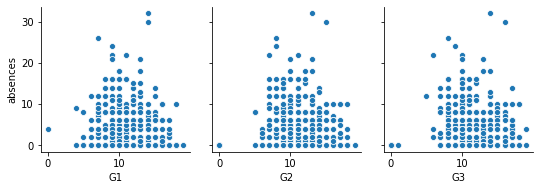

In [60]:
# nieobecności od ocen 
sns.pairplot(df, y_vars="absences", x_vars=["G1","G2","G3"])
plt.show()

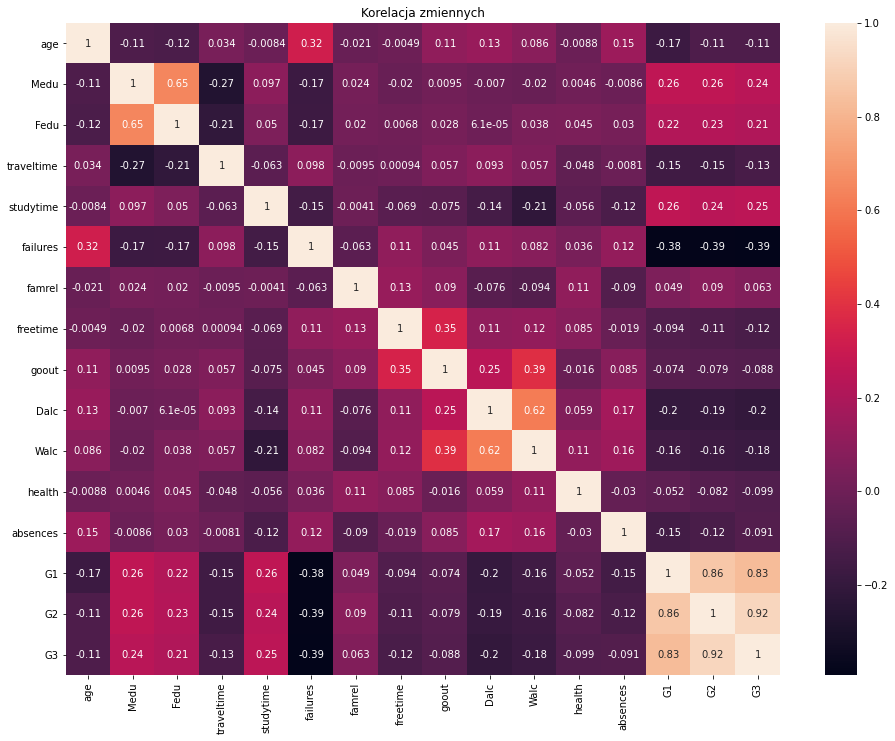

In [64]:
#macierz korelacji
corr = school_grades_df.corr()
f, ax = plt.subplots(figsize=(16, 12))
ax.set_title('Korelacja zmiennych')
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True);

WNIOSKI:
- korelacja na zmiennych Medu i Fedu ma pewien sens bo są to wartości liczbowe opowiadające poziomowi wykształcenia rodziców

- średnie semestrane wraz z roczną mocno ze sobą korelują
- słabą ujemną korelacje widać też w ocenach końcowych a liczbą niezdanych semestrów w poprzedzającym okresie czasuale współczynniki wynoszą tylko -0.38, -0.39, -0.39

- Dalc i Walc (spożyty alkohol w ciągu tygodnia i weekendu):<br> 
~ 0,62 im wiecej dany uczeń spożywa alkoholu w weekend tym więcej spożywa go w tygodniu 

- Age - G1,G2,G3:<br> 
~ -0.11 im ktoś starszy tym gorsza ocena, 

- Medu - G1,G2,G3:<br> 
~ 0.25 wyższe wykształcenie matki -> wyższe oceny

- Fedu - G1,G2,G3:<br> 
~ 0.22 wyższe wykształcenie ojca -> wyższe oceny   (ciekawe ze mniej niż z matką )

- Traveltime - G1,G2,G3:<br> 
~ -0.14 dłuższy czas dojazdu -> niższe oceny   

- studying time - G1,G2,G3:<br>
~ 0.25 dłuższy czas nauki -> wyższe oceny   

- failures - G1,G2,G3:<br> 
opisane wyżej

- Dalc, Walc  - G1,G2,G3:<br> 
~ 0.19 wyższe spożycie alkoholu  -> niższe oceny   (ale tygodniowe ma wiekszy negatywny wpływ)

- absences  - G1,G2:<br> 
~ 0.19 wyższa absecja  -> niższe oceny   (ale tylko na semestralne)

- gout - Walc:<br>
~ 0.39 więcej spotkań z przyjaciółmi -> wyższe spożycie alkoholu


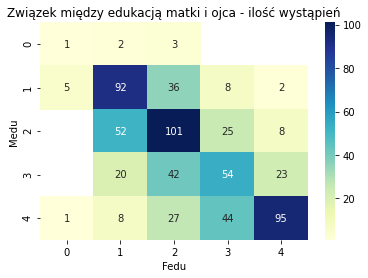

In [29]:
school_grades_df_count = school_grades_df.groupby(['Medu','Fedu']).count().reset_index()
sns.heatmap(school_grades_df_count.pivot("Medu","Fedu","G3"),cmap="YlGnBu",annot=True,fmt=".0f")
plt.title("Związek między edukacją matki i ojca - ilość wystąpień")
plt.show()

Największe liczby mamy na przekątnej, co oznacza, że głównie rodzice mają takie same poziomy edukacji.

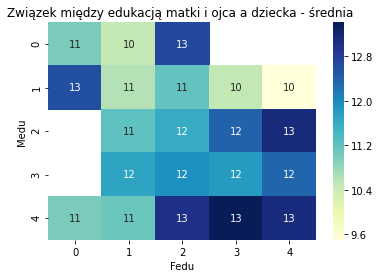

In [31]:
school_grades_df_count = school_grades_df.groupby(['Medu','Fedu']).mean().reset_index()
sns.heatmap(school_grades_df_count.pivot("Medu","Fedu","G3"),cmap="YlGnBu",annot=True,fmt=".0f")
plt.title("Związek między edukacją matki i ojca a dziecka - średnia ")
plt.show()

Możemy zauważyć, że im wyższe wykształcenie obojga rodziców tym większa jest średnia wielkość oceny dziecka.

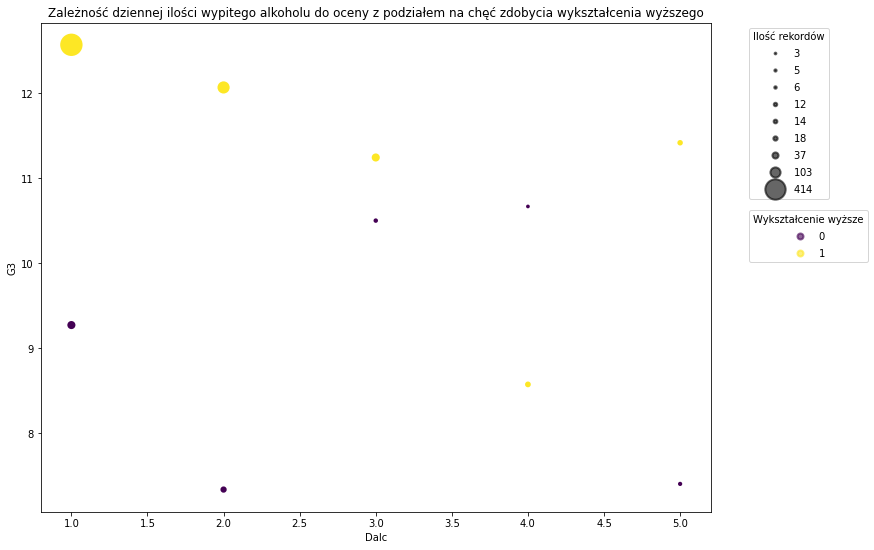

In [85]:
school_grades_df_alcohol_count =school_grades_df.groupby(['higher','Dalc']).count().reset_index()
school_grades_df_alcohol["higher"]=pd.Categorical(school_grades_df_alcohol["higher"])
fig, ax = plt.subplots(figsize=(12, 9))

scatter = ax.scatter(
    x = school_grades_df_alcohol["Dalc"], 
    y = school_grades_df_alcohol["G3"], 
    s=school_grades_df_alcohol_count["G3"], 
    c=school_grades_df_alcohol["higher"].cat.codes, 
    #cmap="Accent", 
    #alpha=0.6, 
    #edgecolors="white", 
    linewidth=2);
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend1 = ax.legend(handles, labels,bbox_to_anchor=(1.05, 0.5),
                    loc="lower left", title="Wykształcenie wyższe")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels,bbox_to_anchor=(1.05, 1), loc="upper left", title="Ilość rekordów")
plt.title("Zależność dziennej ilości wypitego alkoholu do oceny z podziałem na chęć zdobycia wykształcenia wyższego")
plt.xlabel("Dalc")
plt.ylabel("G3")
plt.show()

WNIOSKI:
- wielkość kropek na wykesie mówi nam, że wśród osób chcących zdobyć wykształcenie wyższe im wyższa ocena tym mniejsza ilość wypijanego alkoholu w ciągu tygodnia
- do tego możemy zauważyć, że wśród osób chcących zdobyć wykształcenie wyższe zdecydowana większość osób nie pije dużo alkoholu
- dodatkowo widać, że osoby chcące zdobyć wykształcenie wyższe mają wyższe oceny

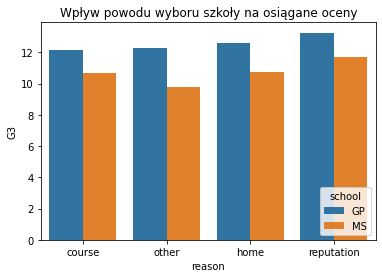

In [4]:
sns.barplot(x="reason", y="G3", hue="school", data=school_grades_df, ci=None)
plt.legend(loc = "lower right",title = "school")
plt.title("Wpływ powodu wyboru szkoły na osiągane oceny")
plt.show()

Możemy zauważyć, że najwyższe średnie oceny otrzymują uczniowie, którzy wybrali te szkoły z powodu ich reputacji.